In [167]:
#pip install biopython, matplotlib

     |████████████████████████████████| 292 kB 612 kB/s eta 0:00:01
     |████████████████████████████████| 41.6 MB 34.2 MB/s eta 0:00:01     |██████████████████████████████  | 38.9 MB 29.1 MB/s eta 0:00:01     |███████████████████████████████▋| 41.0 MB 29.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [877]:
import datetime
import os.path
import itertools
import csv

import matplotlib.pyplot as plt
import numpy as np

from Bio.Seq import Seq, back_transcribe
from Bio import SeqIO

# 1. Class that describes hamsters.

Python class for hamsters.\
For creation "hamster" object it is nedeed to know its name and age (in months).\
Optionally, one can specify the type of hamster (for example, Syrian or Chinese). Default "Not defined".

In [ ]:
class Hamster:
    '''
    Python class for hamsters.
    '''

    def __init__(self, name, age, hamster_type='Not defined'):
        '''
        For creation "hamster" object it is nedeed to know its name and age (in months).
        Optionally, one can specify the type of hamster (for example, Syrian or Chinese). Default "Not defined".
        '''
        self.name = name
        self.hamster_type = hamster_type
        self.age = age
        
        if self.age <= 4:
            self.stage = 'young'            
            
        elif self.age >= 12:
            self.stage = 'old'
        
        else:
            self.stage = 'adult'
        

    def life_stage(self):
        '''
        Method returns the age of a hamster: young, adult or old.
        '''        
        return f"{self.name} is an {self.stage} hamster. It's {self.age} months."


    def is_active(self):
        '''
        Checks if the hamster is probably asleep now. The system time is used. Return the string with state.
        '''
        time_now = datetime.datetime.now().hour
        
        if time_now > 7 and time_now < 20:
            return f'{self.name} is probably sleeping now.'
            
        else:
            return f'{self.name} is probably active now and wants treats.'


    def properties(self):
        '''
        Return string with the basic parameters of the hamster.
        '''
        if self.hamster_type == 'Not defined':            
            return f"The hamster\'s name is {self.name}. It\'s {self.stage} hamster, {self.age} months."
        else:
            return f"The hamster\'s name is {self.name}. It\'s {self.stage} {self.hamster_type} hamster, {self.age} months."

In [ ]:
Bun = Hamster('Bun', 18, 'Djungarian hamster')
print(Bun.is_active())
print(Bun.properties())
print(Bun.life_stage())

# 2. Class that describes RNA sequence data

Class (rooted from str class) with two methods:
- `RNA_translation` - Translation - returns a string corresponding to the protein from the RNA, according to the standard code, using Biopython.
- `RNA_to_DNA` - Reverse transcription method - returns a string corresponding to the DNA from RNA, using Biopython

In [ ]:
class RNASequence(str):
    '''
    Class for operations with RNA sequences. Parent class - str.
    '''
    acid_type = 'RNA'
    
    def __init__(self, rna_sequence):
        self.rna_sequence = rna_sequence
        
    def RNA_translation(self):
        '''
        Translation - returns a string corresponding to the protein from the RNA,
        according to the standard code, using Biopython.
        '''
        self.protein = Bio.Seq.translate(self.rna_sequence)
        return self.protein
        
    def RNA_to_DNA(self):
        '''
        Reverse transcription method - returns a string corresponding to the DNA from RNA, using Biopython.
        '''
        self.template_dna = Bio.Seq.back_transcribe(self.rna_sequence)
        return self.template_dna

In [ ]:
# test for RNASequence class

rna_seq = RNASequence('AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG')
print(rna_seq.RNA_translation())
print(rna_seq.RNA_to_DNA())

rna_seq_2 = RNASequence('AUGC')
print(rna_seq_2.RNA_translation())
print(rna_seq_2.RNA_to_DNA())

# 3. A class inherited from sets. 

Contains only positive numbers when created and does not add non-positive numbers.
Two methods redefined:
- add - checks if number for adding is positive. If so, it adds it to the PositiveSet using the regular set 'add' method.
- update - update PositiveSet using positive values (PositiveSet 'add' method) from the given args.

In [ ]:
class PositiveSet(set):
    '''
    Sets with only positive numbers.
    Two methods supports: add and update (but not |=).
    '''
    
    def __init__(self, old_numbers):
        '''
        Initializes PositiveSet, adding only positive numbers using the add method.
        '''
        for number in old_numbers:
            self.add(number)
    
    def add(self, element):
        '''
        Check if number for adding is positive. 
        If so, it adds it to the PositiveSet using the regular set 'add' method.
        '''
        if element >= 0:
            super().add(element)
        
    def update(self, *args):
        '''
        Update PositiveSet using positive values (PositiveSet 'add' method) from the given args.
        '''
        if len(args) == 1:
            for element in args[0]:
                self.add(element)
        else:
            for added_set in args[:-1]:
                for element in added_set:
                    self.add(element)
    

In [ ]:
# test for PositiveSet.add() method
ordinary_set = set([1, -2, 3, 4, -5, -6, 7])
print(ordinary_set)

new_set = PositiveSet(ordinary_set)
print(new_set)

new_set.add(-5)
print(new_set)

In [ ]:
# test for PositiveSet.update() method

new_set.update([-4, 87])
print(new_set)

y = {14, -15}
x = {10, -12}

new_set.update(x, y)

print(new_set)

# 4. Class for collecting statistics on FASTA files
**Input parameters:** Path to FASTS file

**Methods:**

1. __init__ - Initialize FastaStats object, with:
 - self.**fasta_path** - path to FASTA file;
 - self.**alphabet** - "letters" in FASTA file;
 - self.**seq_type** - string with type of FASTA sequences.
 
2. __str__ - for print self.**fasta_path** while print FastaStats object.

3. **count_seq** - counts the number of sequences in input FASTA file. Return self.**seq_number**.

4. **fasta_alphabet** - Return a set with "letters" found in the FASTA file, self.**alphabet**.

5. sequence_type - Return a type of sequences (self.**seq_type**), RNA or DNA. If it is not possible to uniquely determine the type, it returns a conjectural type with ambiguous "letters".

6. minmax_len - Return min and max lenght of sequences in input FASTA file, self.min_len and self.max_len.

7. histo_length(save_img_path=None) - Building a histogram of sequences lengths in input FASTA file. If save_img_path is specified - save .png output there.

8. percent_GC - Returns the GC percentage of all sequences in a FASTA file, self.GC.
    
9. histo_4_mers(save_img_path=None) - Plot density plot of the frequency of 4-mers. If save_img_path is specified - save .png output there. On the x-axis each of the possible 4-mers, and on the y - their frequency. Work only for DNA sequences (self.**seq_type** should contain 'DNA'). Counted only 4-mers with A,T,C,G, not N.

10. run_all_metrics(new_path=None) - Run all implemented in the FastaStats class methods for calculating FASTA metrics. Create report, the "Metric_Result".csv file and .png histograms. Save report in "'FASTAname'_report" folder with FASTA file, if other folder path not specified (new_path).

In [869]:
class FastaStats:
    '''
    Parse FASTA file with Biopython.
    If you want print class instance it is a path to fasta file.
    Only __str__ defined, not __repr__.
    '''

    def __init__(self, fasta_path):        
        self.fasta_path = fasta_path
        self.alphabet = self.fasta_alphabet()
        self.seq_type = self.sequence_type()


    def __str__(self):
        return self.fasta_path

        
    def count_seq(self):
        '''
        Counts the number of sequences in input FASTA file.
        '''
        self.seq_number = 0
        
        for seq_record in SeqIO.parse(self.fasta_path, "fasta"):
            self.seq_number += 1
            
        return self.seq_number
    
    
    def fasta_alphabet(self):
        '''
        Return a set with "letters" found in the FASTA file.
        '''
        self.alphabet = set()
        [self.alphabet.update(set(seq_record)) for seq_record in SeqIO.parse(self.fasta_path, "fasta")]
        return self.alphabet
        
    
    def sequence_type(self):
        '''
        Return a type of sequences, RNA or DNA.
        If it is not possible to uniquely determine the type, 
        it returns a conjectural type with ambiguous "letters".
        '''
        NA_letters = {'A', 'C', 'G'}

        if NA_letters.issubset(self.alphabet):
            
            if not self.alphabet.difference(NA_letters):
                return 'nucleic acids'
            
            differences = self.alphabet.difference(NA_letters)
            
            if {'U'}.issubset(differences):
                if differences.difference({'U'}):
                    other_letters = differences.difference({'U'})
                    return f'RNA with {"".join(other_letters)}'
                else:
                    return 'RNA'

            if {'T'}.issubset(differences):
                if differences.difference({'T'}):
                    other_letters = differences.difference({'T'})
                    return f'DNA with {"".join(other_letters)}'
                else:
                    return 'DNA'
                
            if differences.intersection({'Y', 'B', 'K', 'D', 'W', 'H'}):
                other_letters = differences.intersection({'Y', 'B', 'K', 'D', 'W', 'H'})
                return f'DNA with {"".join(other_letters)}'
            
            return 'Unknown nucleic acid type, DNA or RNA'
            
        else:
            return 'Unknown sequences type'
    
    
    def minmax_len(self):
        '''
        Return min and max lenght of sequences in input FASTA file.
        '''
        records = [len(seq_record) for seq_record in SeqIO.parse(self.fasta_path, "fasta")]
        self.min_len = min(records)
        self.max_len = max(records)
        return self.min_len, self.max_len  


    def histo_length(self, save_img_path=None):
        '''
        Building a histogram of sequences lengths in input FASTA file.
        If save_img_path is specified - save .png output there.
        '''
        records = [len(seq_record) for seq_record in SeqIO.parse(self.fasta_path, "fasta")]

        plt.figure(figsize=(10,5))
        plt.style.use('seaborn-whitegrid')
        plt.hist(x=records, 
                 color = "skyblue", ec="blue", 
                 linewidth=0.5, 
                 bins=self.minmax_len()[1]-self.minmax_len()[0])
        plt.suptitle(f'Histogram of sequences lengths', fontsize=18)
        plt.title(f'file: "{os.path.split(self.fasta_path)[1]}"', fontsize=13)
        plt.ylabel('Number of sequences', fontsize=13)
        plt.xlabel('Sequences length', fontsize=13)
        
        if save_img_path:

            if save_img_path.count('.png', -4, -1) == 0:
                save_img_path = os.path.join(save_img_path, 'histo_length.png')

            plt.savefig(save_img_path, dpi=100, bbox_inches='tight')
        else:
            plt.show()
        
        plt.close()
    
    
    def percent_GC(self):
        '''
        Returns the GC percentage of all sequences in a FASTA file.
        '''
        all_GC = 0
        all_lenght = 0

        for seq_record in SeqIO.parse(self.fasta_path, "fasta"):
            all_lenght += len(seq_record)
            all_GC += seq_record.seq.upper().count('C')
            all_GC += seq_record.seq.upper().count('G')
        
        self.GC = round(all_GC * 100 / all_lenght, 2)
        
        return self.GC
    
    
    def histo_4_mers(self, save_img_path=None):
        '''
        Plot density plot of the frequency of 4-mers.
        If save_img_path is specified - save .png output there.
        On the x-axis each of the possible 4-mers, and on the y - their frequency.
        Work only for DNA sequences (only A,T,G,C and N is possible).
        Counted only 4-mers with A,T,C,G, not N.
        '''
        if 'DNA' not in self.seq_type:
            print('Unable to calculate frequency of 4-mers!')
            return

        kmers = []
        all_kmers_number = 0

        # for 4-mers with different than ATGC letters:
        #for comb in set(itertools.combinations(list(self.alphabet) * len(self.alphabet), 4)):
        #    kmers.append(''.join(comb))
        
        for comb in set(itertools.combinations(['A', 'T', 'G', 'C'] * 4, 4)):
            kmers.append(''.join(comb))
        
        kmers_dict = dict.fromkeys(kmers, 0)
        
        for seq_record in SeqIO.parse(self.fasta_path, "fasta"):
            for i in range(len(seq_record) - 3):
                if seq_record.seq[i:i+4] in kmers_dict:
                    kmers_dict[seq_record.seq[i:i+4]] += 1
                    all_kmers_number += 1

        for found_kmers in kmers_dict:
            if kmers_dict[found_kmers] != 0:
                kmers_dict[found_kmers] = kmers_dict[found_kmers] / all_kmers_number
            
        kmers_dict = dict(sorted(kmers_dict.items(), key=lambda item: item[1], reverse=True))
        kmers_df = pd.DataFrame(kmers_dict.items(), columns=['kmer','dens'])
        
        plt.figure(figsize=(40,30))
        plt.style.use('seaborn-whitegrid')
        plt.plot(kmers_df['kmer'], kmers_df['dens'], 
                 color = "skyblue", linewidth=3.5)
        plt.xticks(rotation='vertical', fontsize=8)
        plt.title(f'4-mer frequency plot \n file: "{os.path.split(self.fasta_path)[1]}"',
                  fontsize=30)
        plt.ylabel('Frequency', fontsize=25)
        plt.xlabel('4-mer', fontsize=25)
        
        if save_img_path:
            
            if save_img_path.count('.png', -4, -1) == 0:
                save_img_path = os.path.join(save_img_path, 'kmer_frequency.png')

            plt.savefig(save_img_path, dpi=100, bbox_inches='tight')
        
        else:
            plt.show()
        
        plt.close()
        
    
    def run_all_metrics(self, new_path=None):
        '''
        Run all implemented in the FastaStats class methods for calculating FASTA metrics.
        Create report, the "Metric_Result" .csv file and .png histograms.
        Save report in "'FASTA'_report" folder with FASTA file, if other folder path not specified (new_path).
        '''
        
        if new_path:
            path_to_report = new_path
            
        else:
            path_to_report = os.path.dirname(self.fasta_path)
            path_to_report = os.path.join(path_to_report, os.path.split(self.fasta_path)[1]+'_report')
        
        os.makedirs(path_to_report, exist_ok=True)

        self.histo_4_mers(save_img_path=path_to_report)
        self.histo_length(save_img_path=path_to_report)
        
        min_len, max_len = self.minmax_len()
        
        with open(os.path.join(path_to_report, 'Metric_Result.csv'), 'w') as file:
            writer = csv.writer(file)
            
            writer.writerow(['Sequences type:', self.seq_type])
            writer.writerow(['Number of sequences:', self.count_seq()])
            writer.writerow(['Min sequence length:', min_len])
            writer.writerow(['Max sequence length:', max_len])
            writer.writerow(['GC percent (%):', self.percent_GC()])
            writer.writerow(['FASTA letters:', ''.join(self.fasta_alphabet())])
            


In [870]:
example_fasta = FastaStats('./example.fasta')

In [871]:
print(example_fasta)
example_fasta.percent_GC()

./example.fasta


51.17

In [872]:
example_fasta.count_seq()

94

In [873]:
example_fasta.minmax_len()

(572, 789)

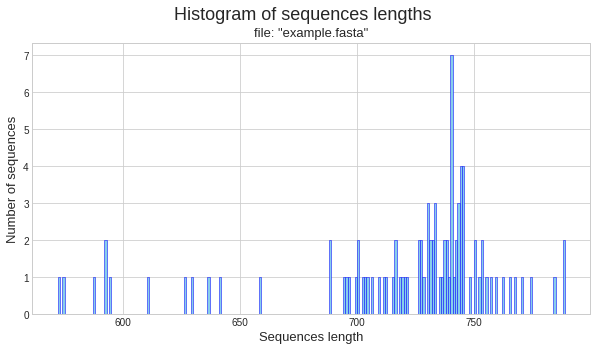

In [874]:
example_fasta.histo_length()

In [875]:
example_fasta.run_all_metrics()

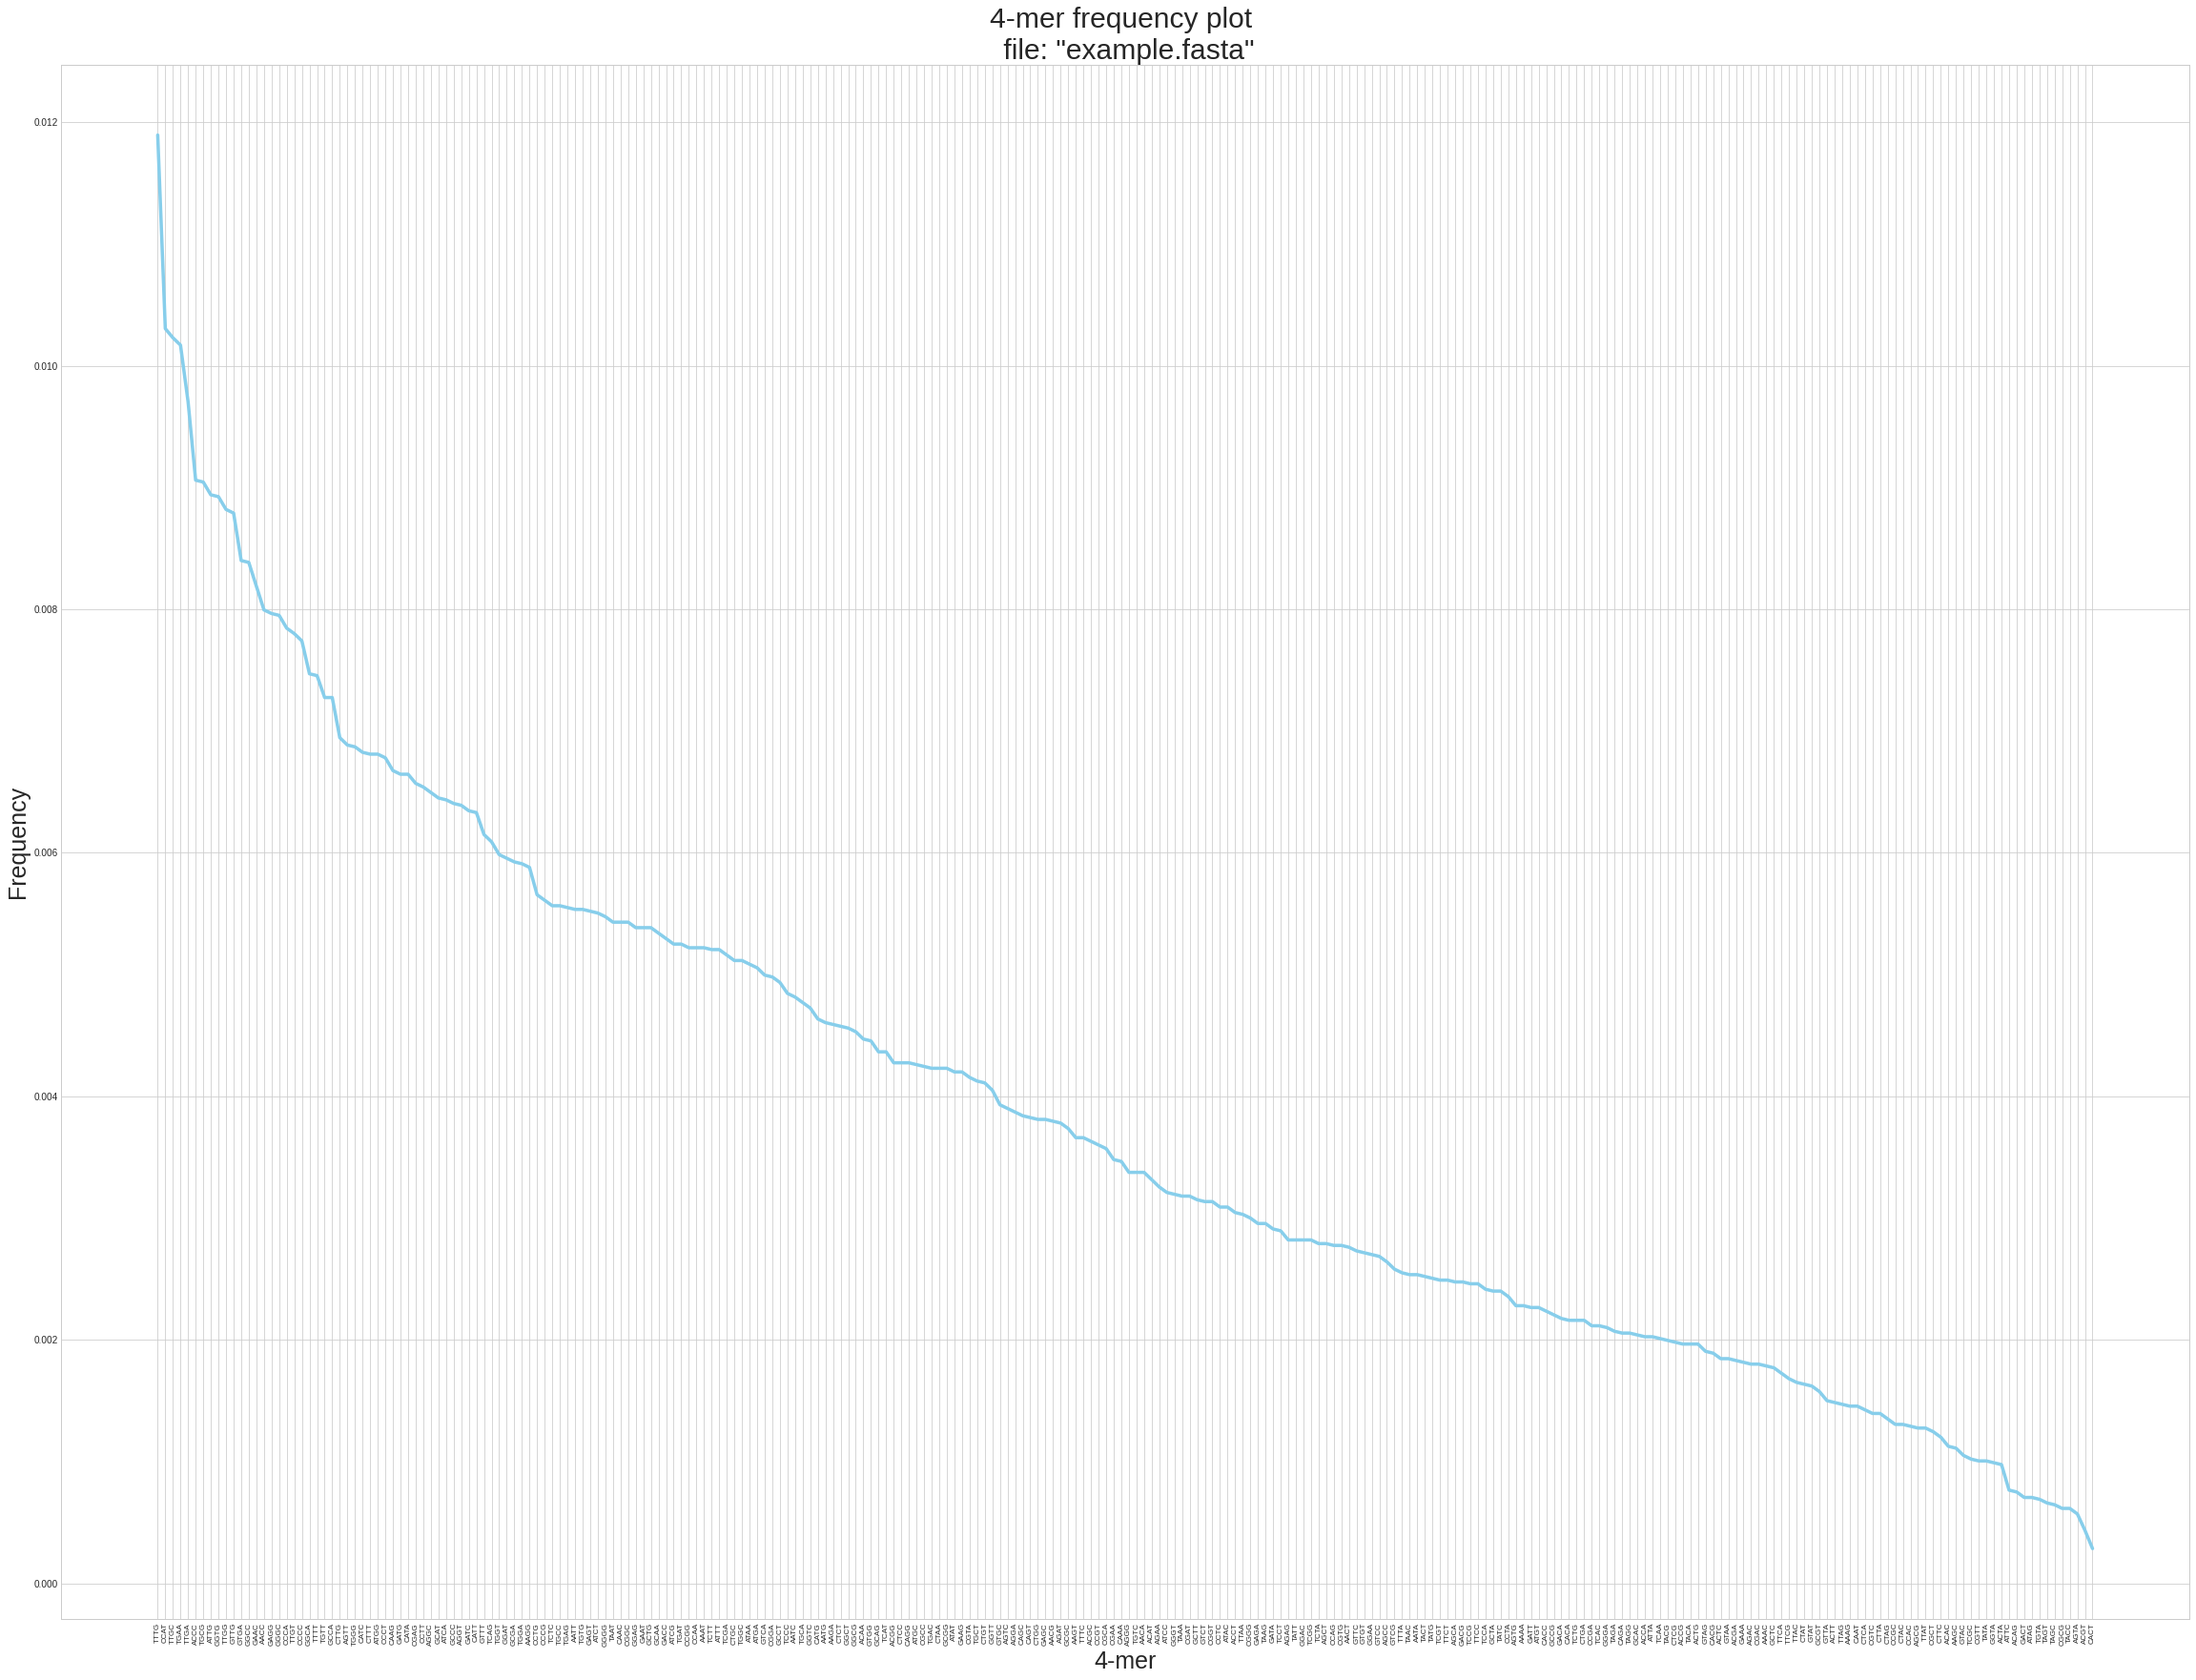

In [876]:
example_fasta.histo_4_mers()

In [793]:
for seq_record in SeqIO.parse('./example.fasta', "fasta"):
    print(seq_record.id)

SyntaxError: 'return' outside function (1462945389.py, line 2)